In [54]:
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\test.csv
dataset\train.csv


In [55]:
train_data=pd.read_csv('dataset/train.csv', header=0)
test_data=pd.read_csv('dataset/test.csv', header=0)

In [56]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [57]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [59]:
# Standard ML Models for comparison

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [60]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Replacing the categorical data with Numeric Data

In [83]:
#train_data["Gender"].replace({"Male":0, "Female":1}, inplace=True)

test_data["Gender"].replace({"Male":0, "Female":1}, inplace=True)

In [81]:
#train_data["Vehicle_Age"].replace({"< 1 Year": 0, "1-2 Year":1, "> 2 Years":3}, inplace=True)

test_data["Vehicle_Age"].replace({"< 1 Year": 0, "1-2 Year":1, "> 2 Years":3}, inplace=True)

In [82]:
#train_data["Vehicle_Damage"].replace({"Yes": 0, "No":1}, inplace=True)

test_data["Vehicle_Damage"].replace({"Yes": 0, "No":1}, inplace=True)

In [64]:
train_data['Gender'].unique()

array([0, 1], dtype=int64)

In [65]:
train_data['Vehicle_Age'].unique()

array([3, 1, 0], dtype=int64)

In [66]:
train_data['Vehicle_Damage'].unique()

array([0, 1], dtype=int64)

# Visualization of the Data

## Creating a correalation Graph

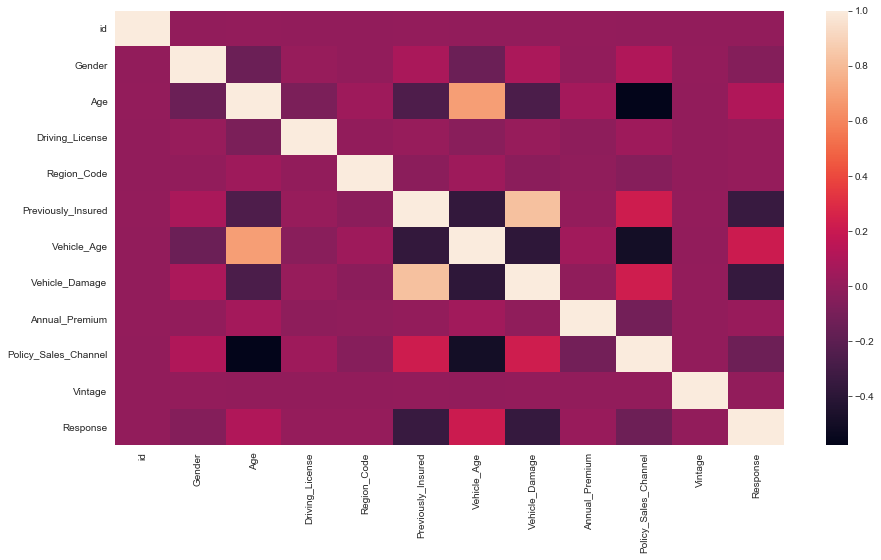

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

## Drawing a histogram

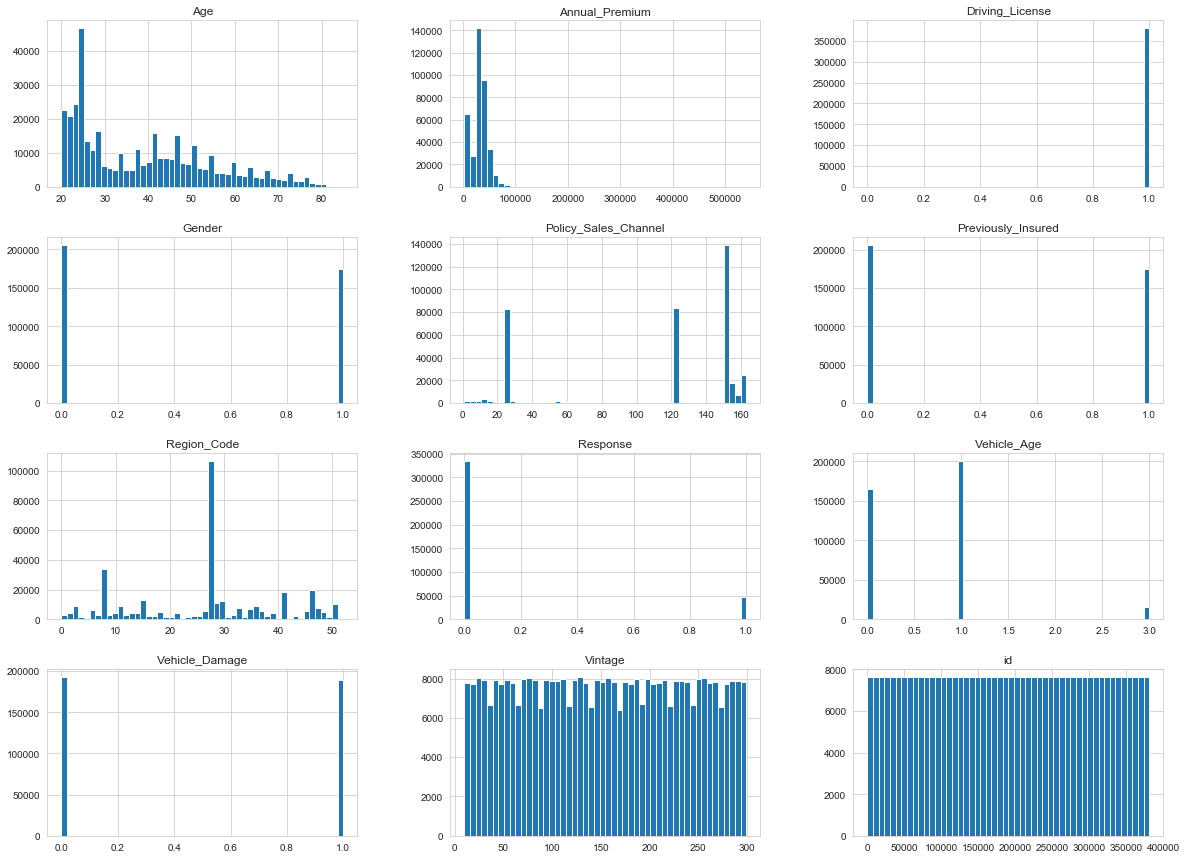

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

## Drawing a Scatter Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204BE27F508>,
      dtype=object)

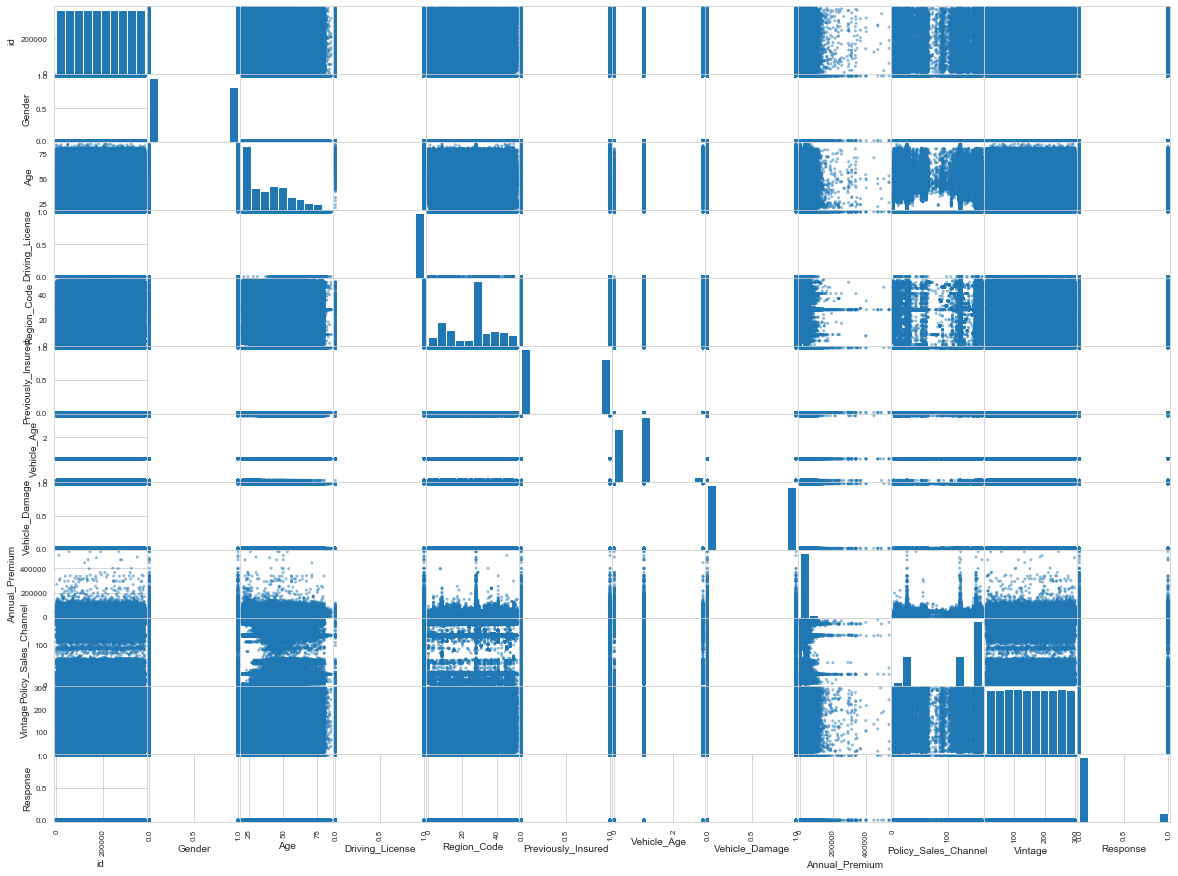

In [69]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data, figsize=(20, 15))

## Vizualizing the frequency Distribution

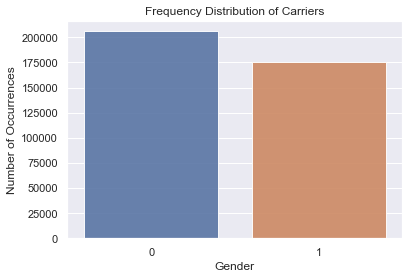

<Figure size 4320x1728 with 0 Axes>

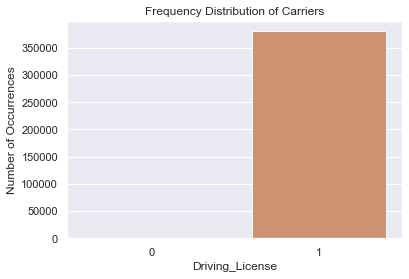

<Figure size 4320x1728 with 0 Axes>

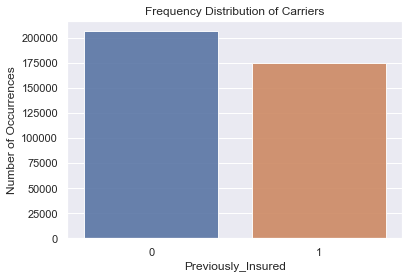

<Figure size 4320x1728 with 0 Axes>

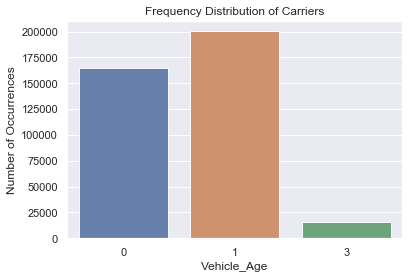

<Figure size 4320x1728 with 0 Axes>

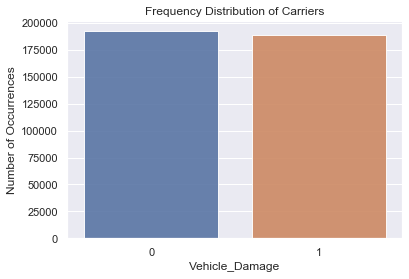

<Figure size 4320x1728 with 0 Axes>

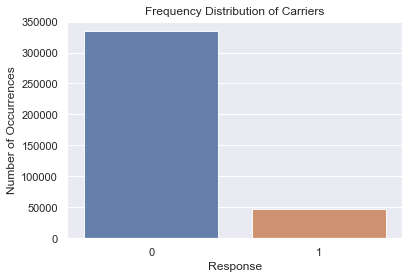

<Figure size 4320x1728 with 0 Axes>

In [75]:
for each in train_data.columns.to_list():
    #print(len(train_data[each].unique()),each)
    if len(train_data[each].unique())<40:
        carrier_count = train_data[each].value_counts()
        sns.set(style="darkgrid")
        sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
        plt.title('Frequency Distribution of Carriers')
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel(each, fontsize=12)
        plt.figure(figsize=(60,24))
        plt.show()

# Creating a Base Line Model

## Creating Traing, test , and Validation Splits

In [72]:
valid_fraction = 0.05
valid_size = int(len(train_data) * valid_fraction)

train = train_data[:-2 * valid_size]
valid = train_data[-2 * valid_size:-valid_size]
test = train_data[-valid_size:]

## Trying with Lightgbm

In [77]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter

feature_cols = train.columns.drop('Response')


params = {}
params['learning_rate'] = 0.045
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'binary'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.5, 1: 0.5}



clf = lgb.LGBMClassifier(**params)
clf.fit(train[feature_cols], train['Response'], early_stopping_rounds=100, eval_set=[(valid[feature_cols], valid['Response']),
        (test[feature_cols], test['Response'])], eval_metric='multi_error', verbose=True)

eval_score = roc_auc_score(test['Response'], clf.predict(test[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

[1]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.360465	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.356039
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.354345	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.35002
[3]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.34831	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.344102
[4]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.342823	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.338761
[5]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.340171	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.336067
[6]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.337882	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.333821
[7]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.332991	valid_1's binary_error: 0.11

[61]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.268526	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.266981
[62]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.26832	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.266752
[63]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.268102	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.266546
[64]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.267948	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.266405
[65]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.267738	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.2662
[66]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.267509	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.265989
[67]	valid_0's binary_error: 0.120283	valid_0's binary_logloss: 0.267322	valid_1's binary_error: 0.117974	valid_1's binary_logloss: 0.265811
[68]	valid_0's b

In [78]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)


clf = lgb.LGBMClassifier(**params)

clf.fit(train_data[feature_cols], train_data['Response'], eval_metric='multi_error', verbose=False)


eval_score_acc = roc_auc_score(train_data['Response'], clf.predict(train_data[feature_cols]))

print('ACC: {}'.format(eval_score_acc))

{'learning_rate': 0.045, 'max_depth': 18, 'n_estimators': 1, 'objective': 'binary', 'boosting_type': 'gbdt', 'subsample': 0.7, 'random_state': 42, 'colsample_bytree': 0.7, 'min_data_in_leaf': 55, 'reg_alpha': 1.7, 'reg_lambda': 1.11}
ACC: 0.5


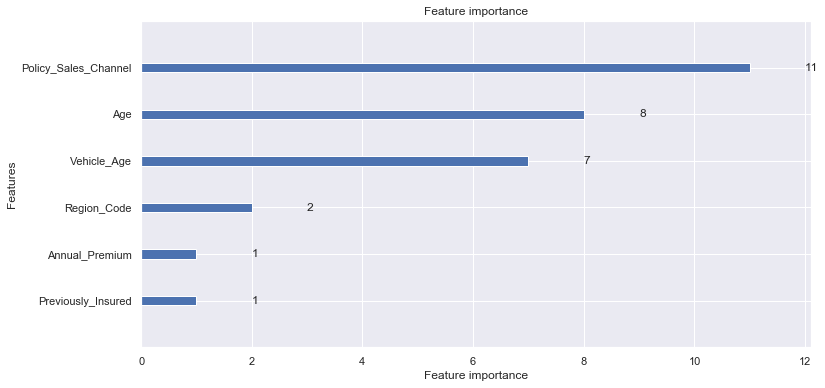

In [85]:
preds = clf.predict(test_data[feature_cols])

Counter(preds)
submission = pd.DataFrame({'id':test_data['id'], 'Response':preds})


plt.rcParams['figure.figsize'] = (12, 6)
lgb.plot_importance(clf)
plt.show()

In [86]:
submission.to_csv('output/submission.csv', index=False)